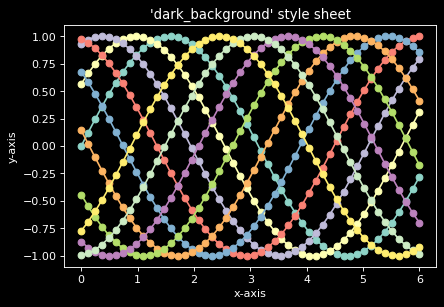

In [1]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('dark_background')

fig, ax = plt.subplots()

L = 6
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax.plot(x, np.sin(x + s), 'o-')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("'dark_background' style sheet")

plt.show()

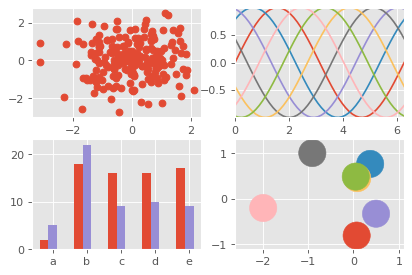

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axs.flat

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[2]['color'])
ax3.set_xticks(x + width, labels=['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))
ax4.axis('equal')
ax4.margins(0)

plt.show()

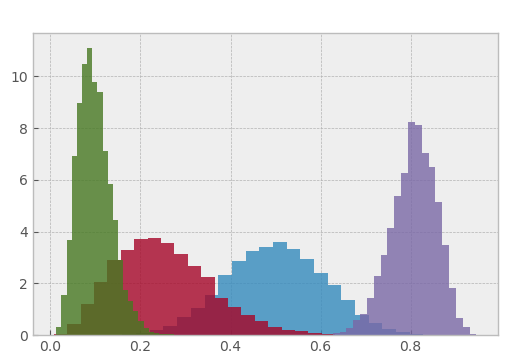

In [3]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 100

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.style.use('bmh')


def plot_beta_hist(ax, a, b):
    ax.hist(np.random.beta(a, b, size=10000),
            histtype="stepfilled", bins=25, alpha=0.8, density=True)


fig, ax = plt.subplots()
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 4, 12)
plot_beta_hist(ax, 50, 12)
plot_beta_hist(ax, 6, 55)
ax.set_title("'bmh' style sheet")

plt.show()

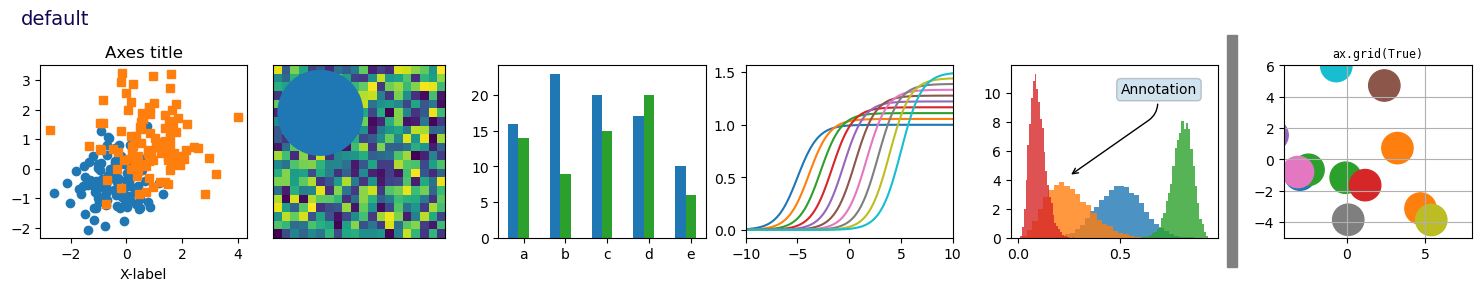

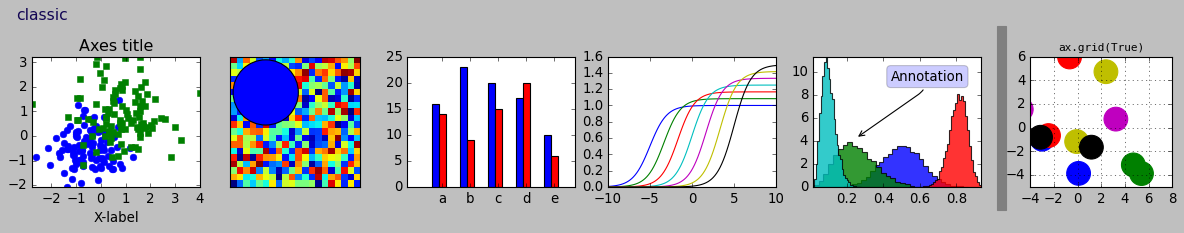

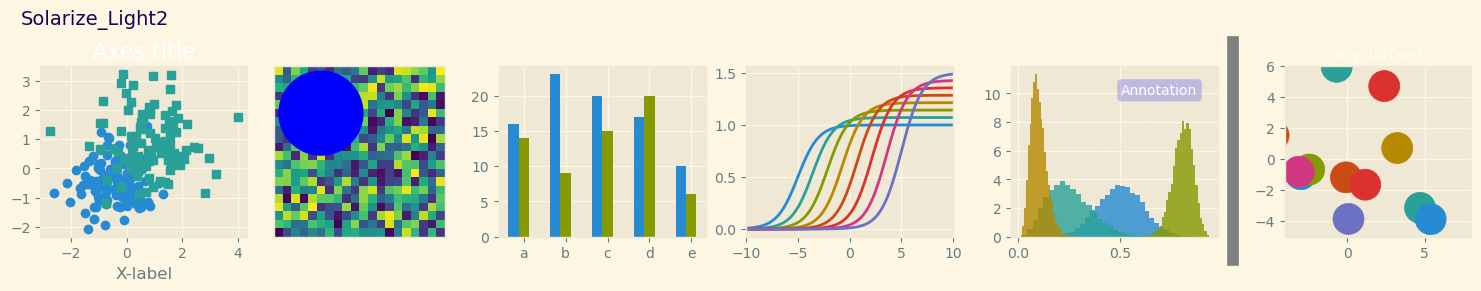

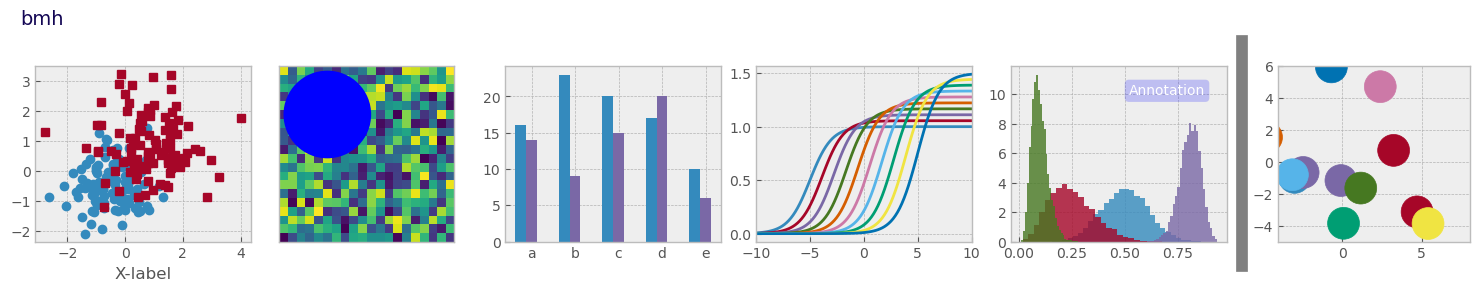

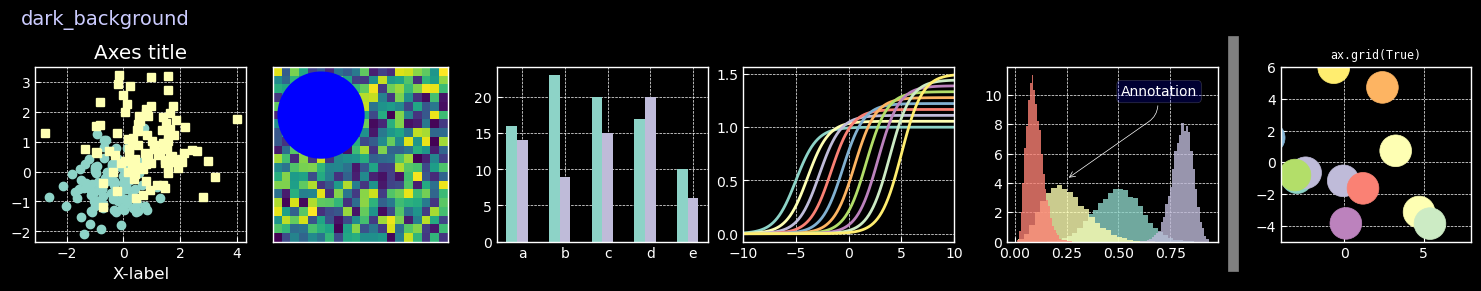

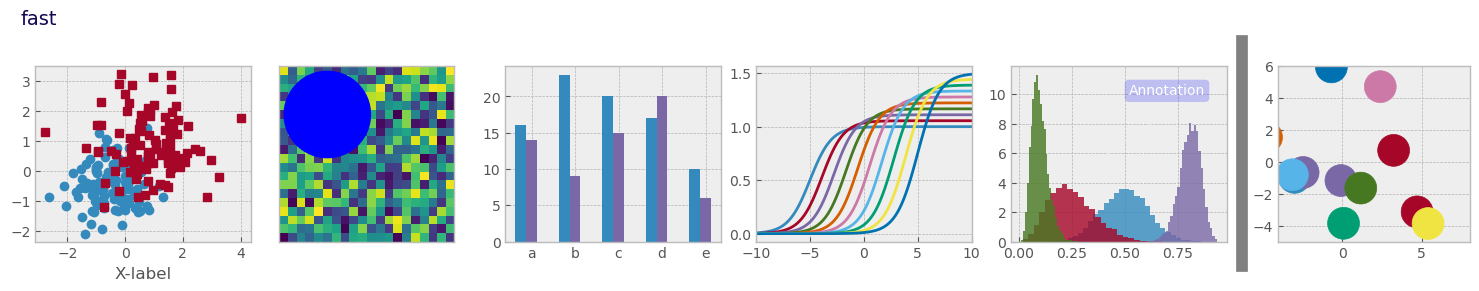

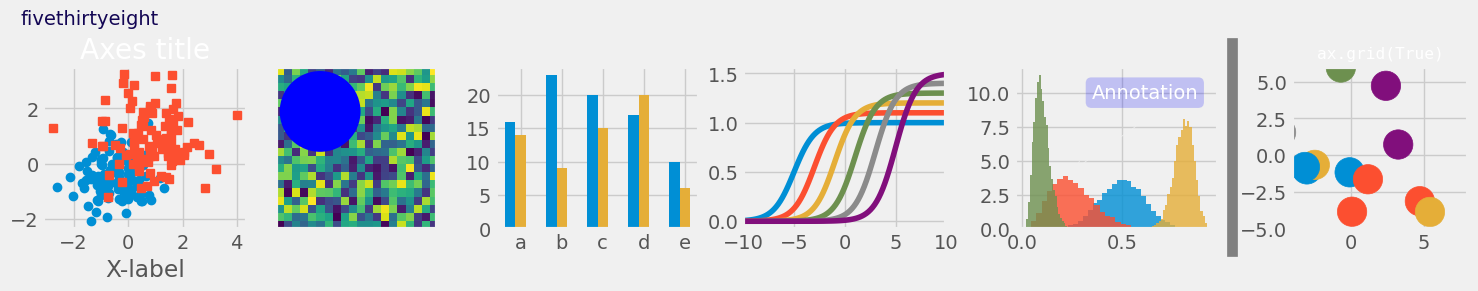

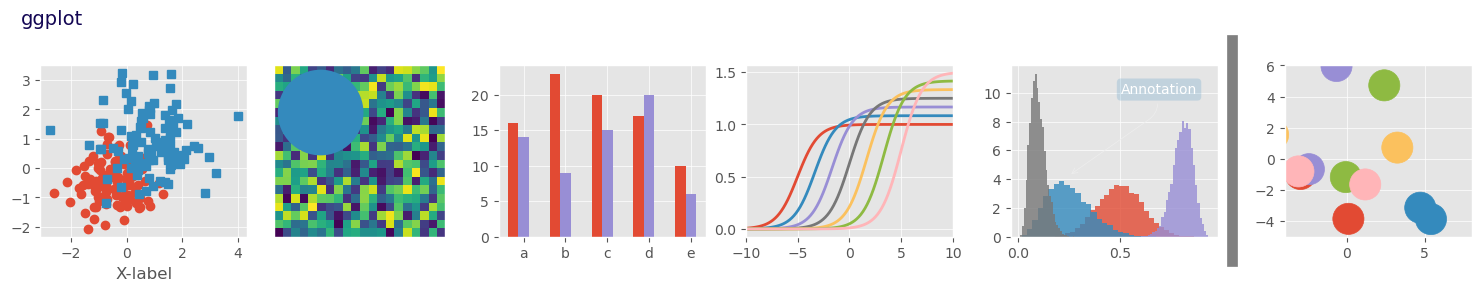

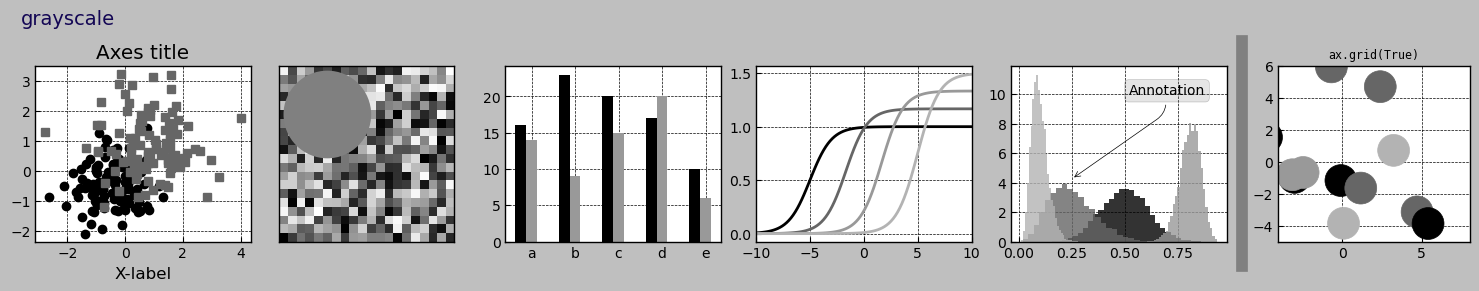

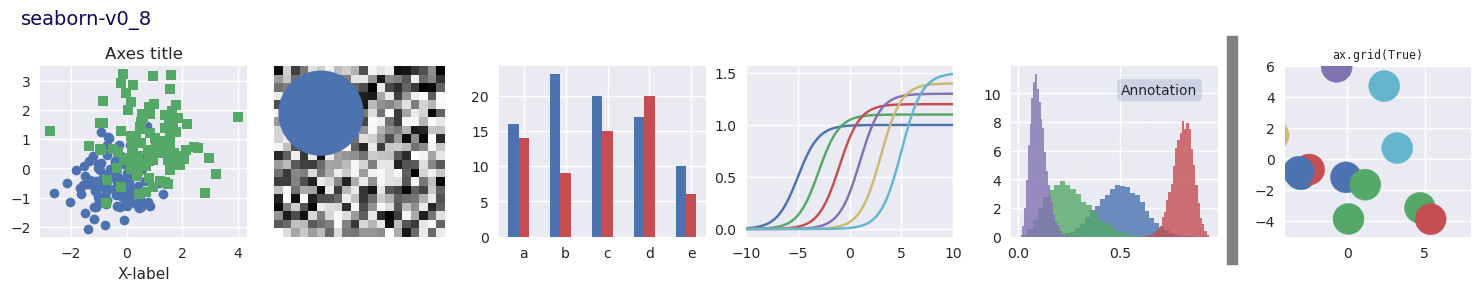

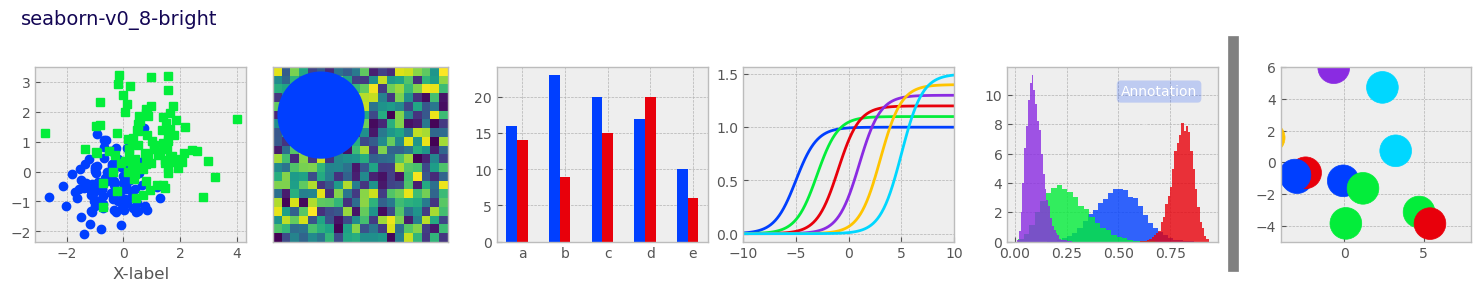

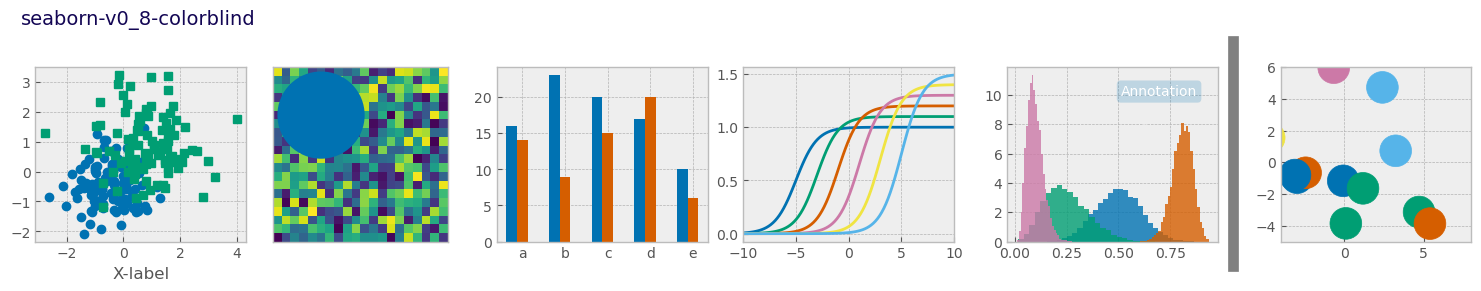

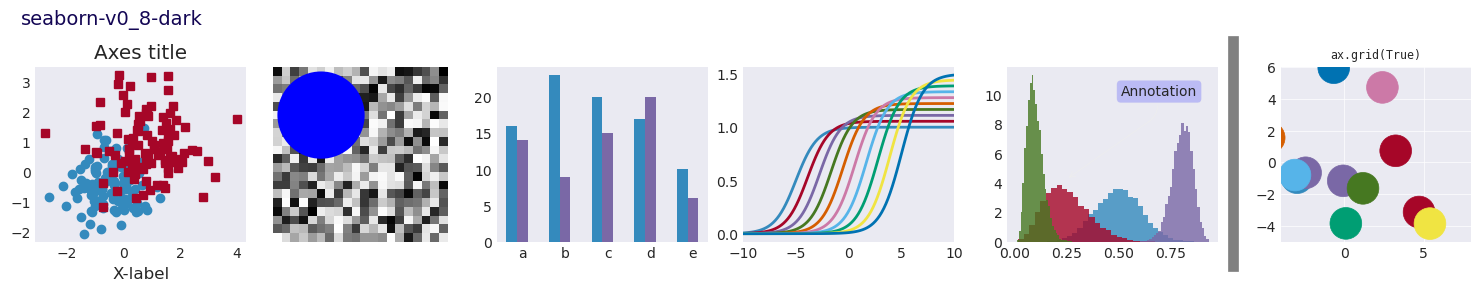

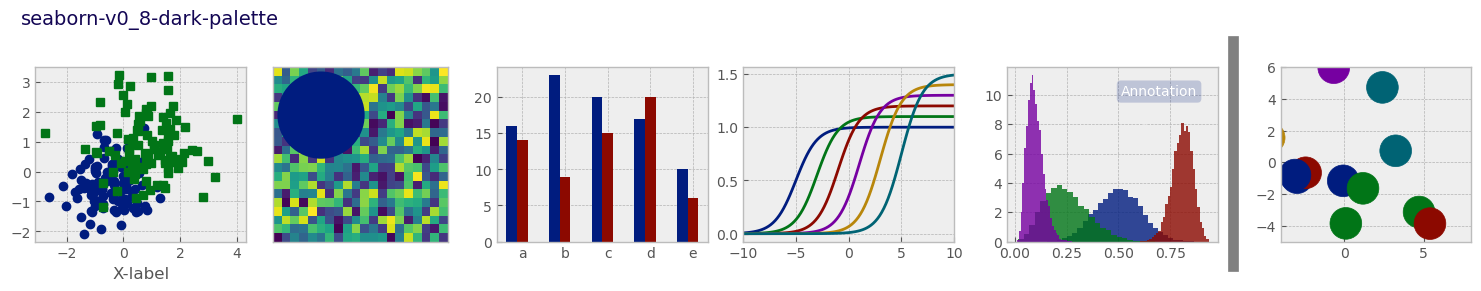

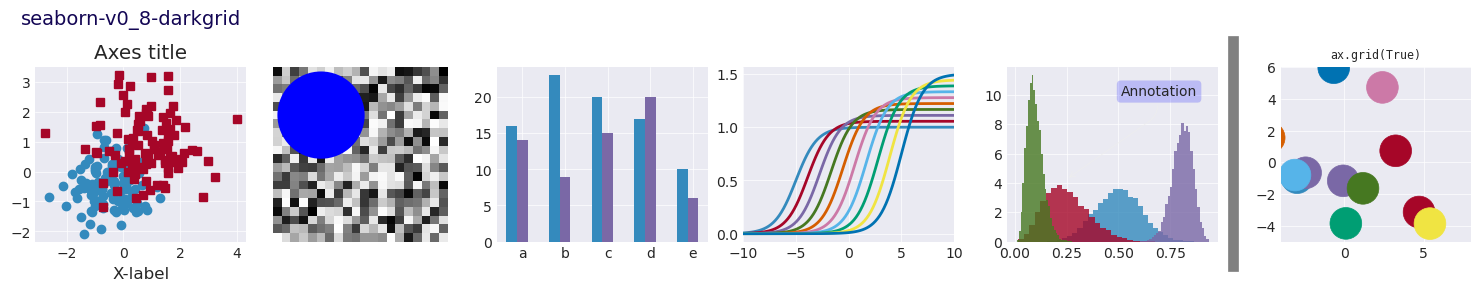

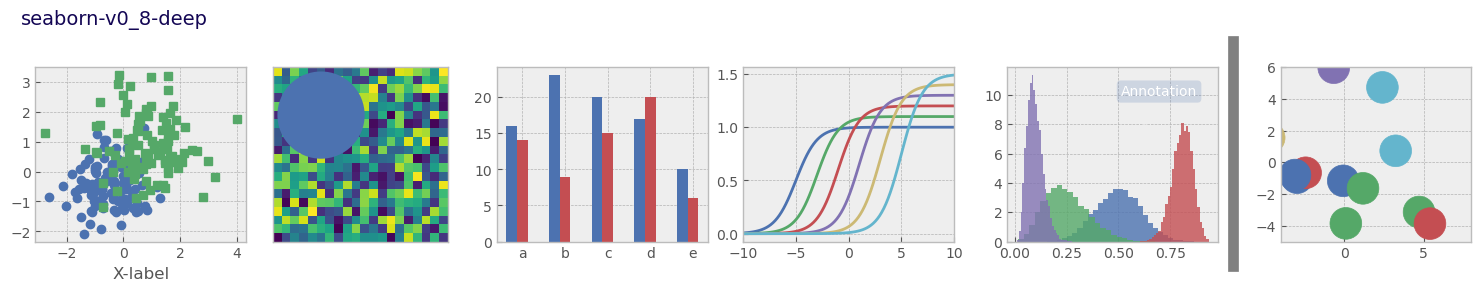

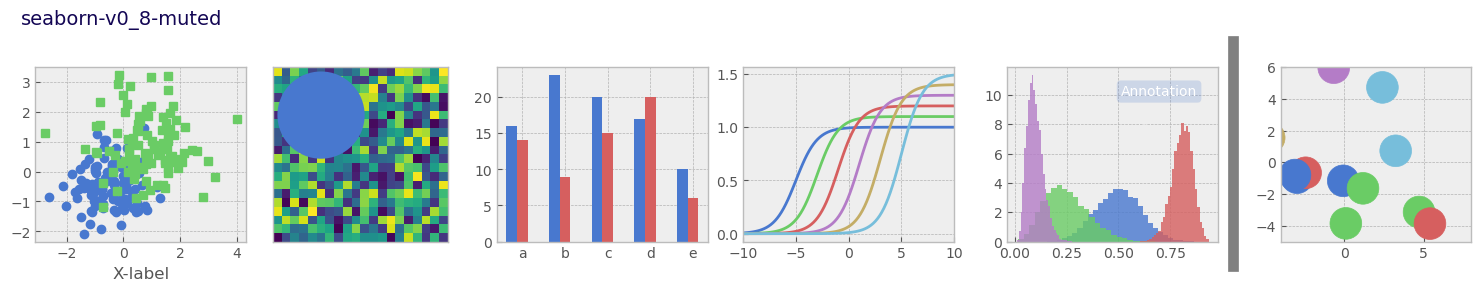

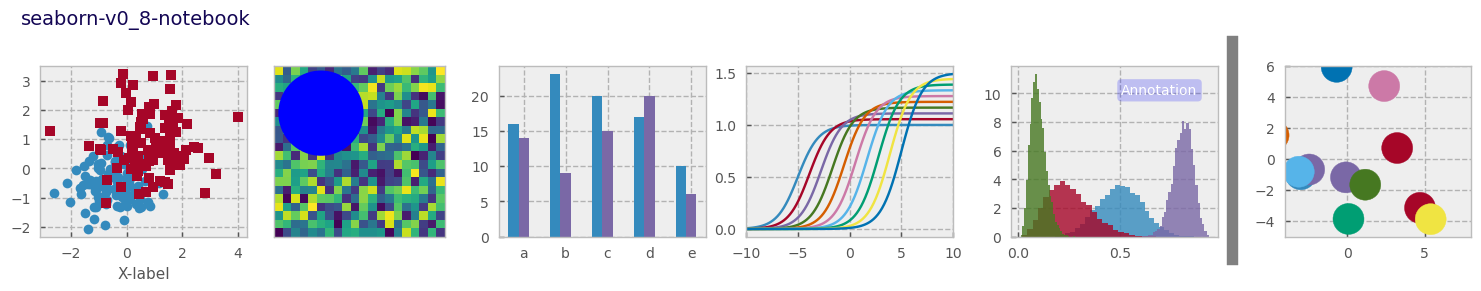

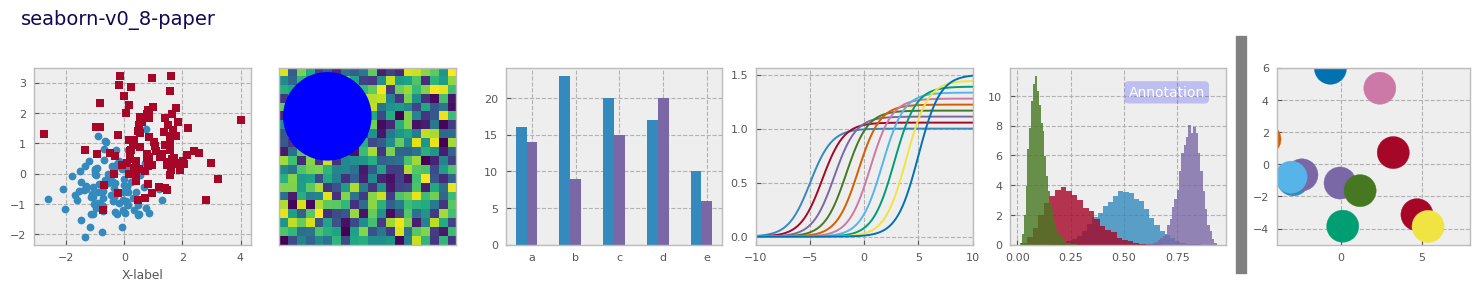

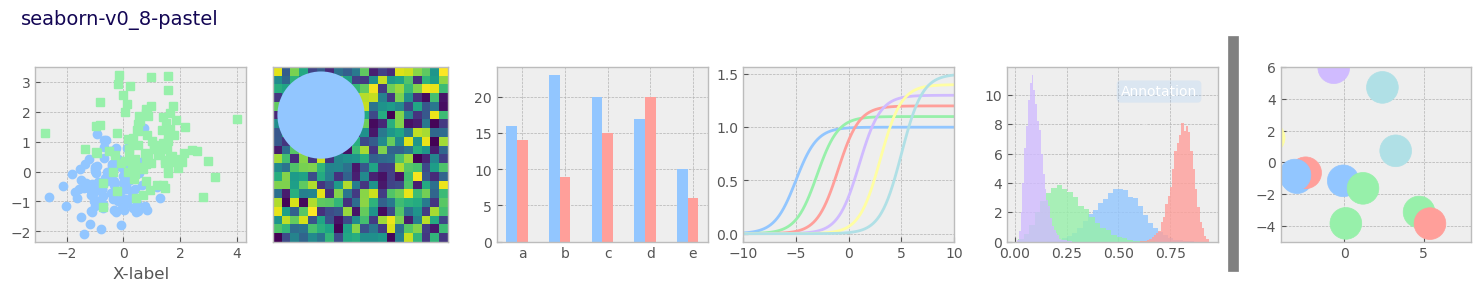

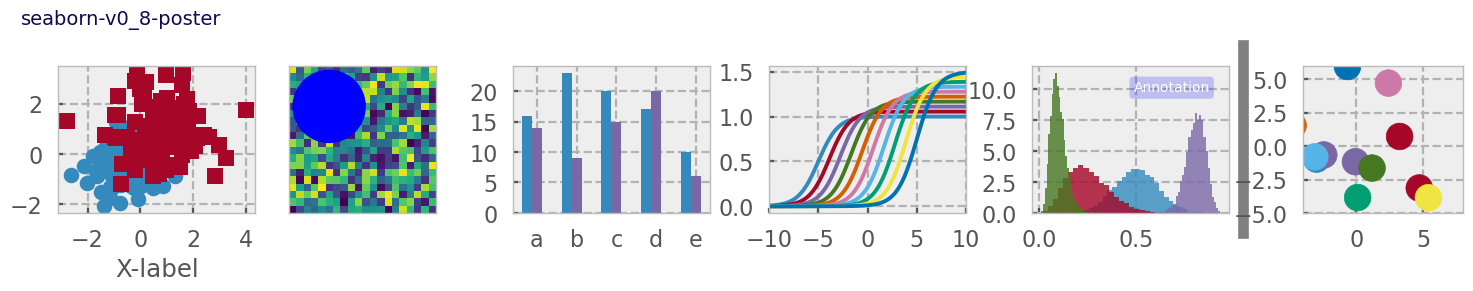

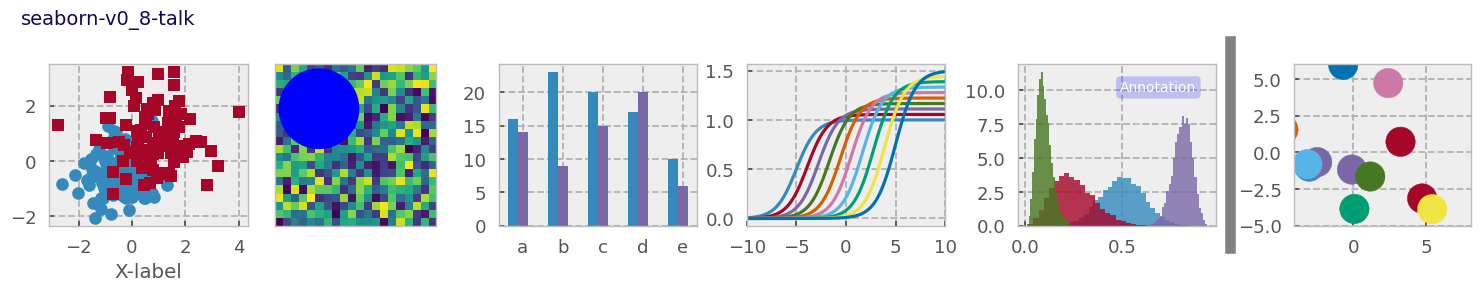

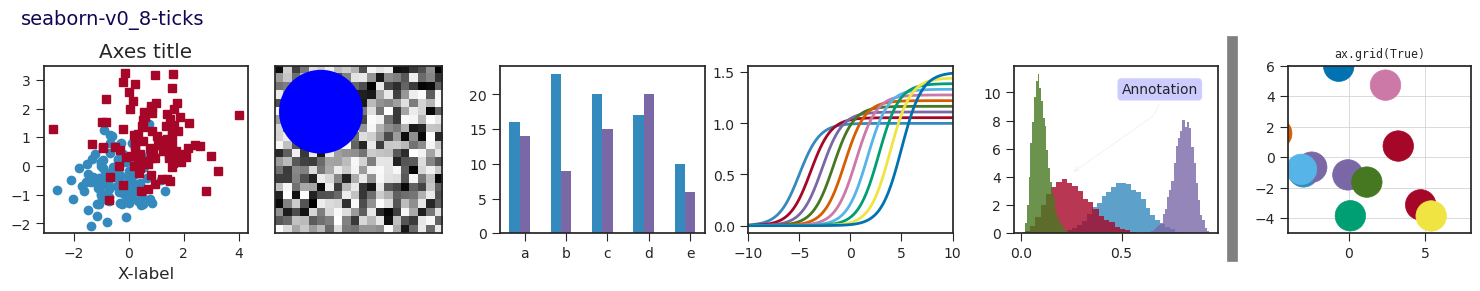

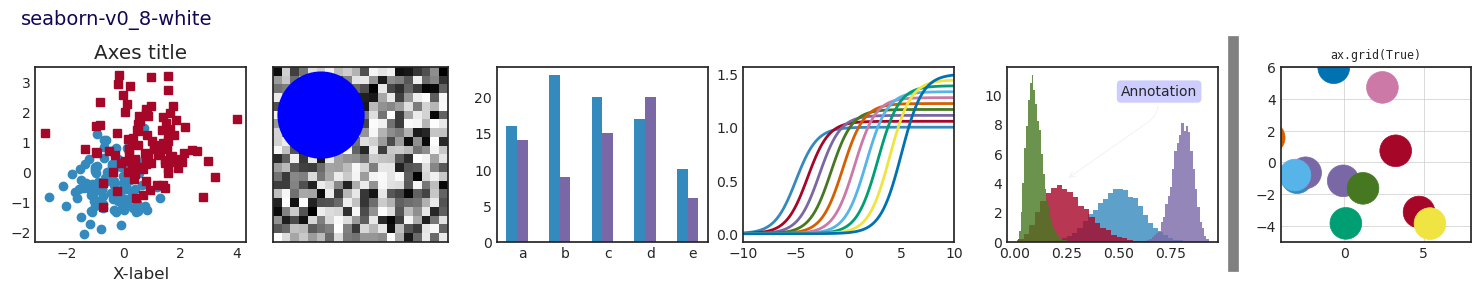

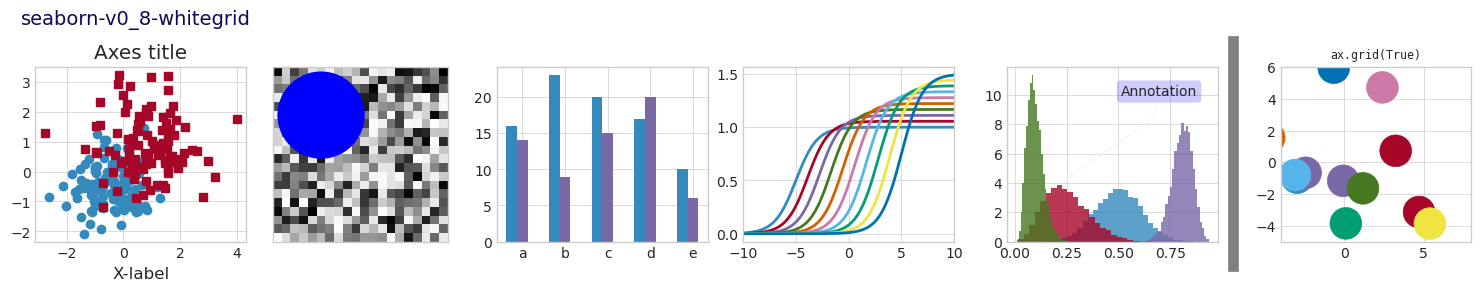

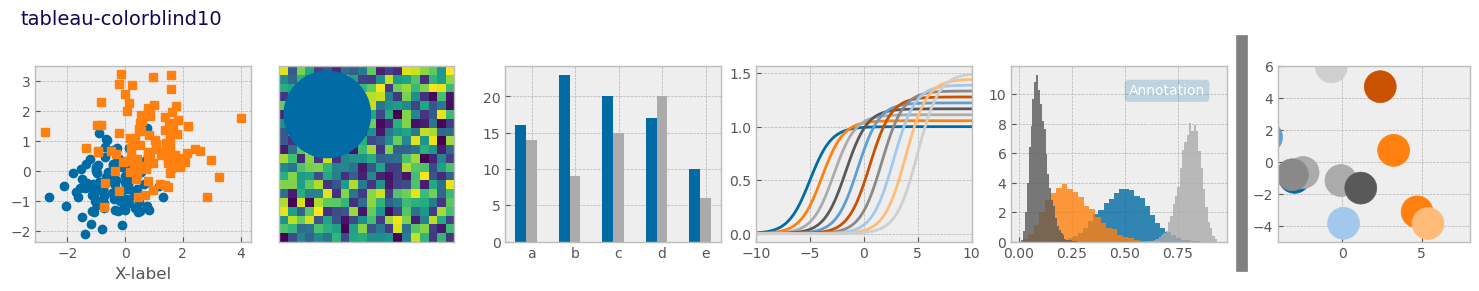

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

# Fixing random state for reproducibility
np.random.seed(19680801)


def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot."""
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    ax.set_title('Axes title')
    return ax


def plot_colored_lines(ax):
    """Plot lines with colors following the style color cycle."""
    t = np.linspace(-10, 10, 100)

    def sigmoid(t, t0):
        return 1 / (1 + np.exp(-(t - t0)))

    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shifts = np.linspace(-5, 5, nb_colors)
    amplitudes = np.linspace(1, 1.5, nb_colors)
    for t0, a in zip(shifts, amplitudes):
        ax.plot(t, a * sigmoid(t, t0), '-')
    ax.set_xlim(-10, 10)
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels."""
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width, labels=['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """
    Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'](),
                           range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    ax.grid(visible=True)

    # Add title for enabling grid
    plt.title('ax.grid(True)', family='monospace', fontsize='small')

    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch."""
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation."""
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)

    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25),
                xytext=(0.9, 0.9), textcoords=ax.transAxes,
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style."""
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    fig, axs = plt.subplots(ncols=6, nrows=1, num=style_label,
                            figsize=(14.8, 2.8), layout='constrained')

    # make a suptitle, in the same style for all subfigures,
    # except those with dark backgrounds, which get a lighter color:
    background_color = mcolors.rgb_to_hsv(
        mcolors.to_rgb(plt.rcParams['figure.facecolor']))[2]
    if background_color < 0.5:
        title_color = [0.8, 0.8, 1]
    else:
        title_color = np.array([19, 6, 84]) / 256
    fig.suptitle(style_label, x=0.01, ha='left', color=title_color,
                 fontsize=14, fontfamily='DejaVu Sans', fontweight='normal')

    plot_scatter(axs[0], prng)
    plot_image_and_patch(axs[1], prng)
    plot_bar_graphs(axs[2], prng)
    plot_colored_lines(axs[3])
    plot_histograms(axs[4], prng)
    plot_colored_circles(axs[5], prng)

    # add divider
    rec = Rectangle((1 + 0.025, -2), 0.05, 16,
                    clip_on=False, color='gray')

    axs[4].add_artist(rec)

if __name__ == "__main__":

    # Set up a list of all available styles, in alphabetical order but
    # the `default` and `classic` ones, which will be forced resp. in
    # first and second position.
    # styles with leading underscores are for internal use such as testing
    # and plot types gallery. These are excluded here.
    style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available
        if style != 'classic' and not style.startswith('_'))

    # Plot a demonstration figure for every available style sheet.
    for style_label in style_list:
        with plt.rc_context({"figure.max_open_warning": len(style_list)}):
            with plt.style.context(style_label):
                plot_figure(style_label=style_label)

    plt.show()

# <br>

## Fonts definition
---

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 20 20:10:20 2023

@author: eduardo
"""
font1 = {'family':"Cantarell","style": "italic",'color':'black','size':15}
font2 = {'family':"monospace","style": "italic",'color':'black','size':15,'name':'source-code'}

"""
rcp['font.family'] = ['sans-serif']
rcp['font.sans-serif'] = ['Computer Modern Sans Serif']
rcp['font.family'] = ['sans']
rcp['font.sans'] = ['DroidSans-Bold']
rcp['font.family'] = ['times']
rcp['font.times'] = ['times']
rcp['font.family'] = ['serif']
rcp['font.serif'] =  ['DejaVuSerif-Italic']
rcp['font.family'] = ['monospace']
rcp['font.monospace'] =  ['LiberationMono-BoldItalic']
rcp['font.family'] = ['cursive']
rcp['font.cursive'] =  ['arial', 'Cantarell']
"""
# font6 = {'family':"times","style": "italic",'color':'black','size':20'name':"times"}
# font7 = {'family':"cursive","style": "italic",'color':'black','size':18'name':"arial"}
# font2 = {'family':"sans-serif","style": "italic",'color':'black','size':16, 'name':"Computer Modern Sans Serif",]